<a href="https://colab.research.google.com/github/ssubbinn/ESAA-OB/blob/main/2%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4. 모델 훈련

1) 선형 회귀

- 직접 계산할 수 있는 공식을 사용하여 훈련세트에 대해 비용함수를 최소화라는 모델파라미터를 해석적으로 구함

- 경사하강법 이라고 불리는 방식을 사용하여 비용함수를 훈련 세트에 대해 최소화

2) 다항 회귀

3) 규제 기법

### 4.1 선형 회귀


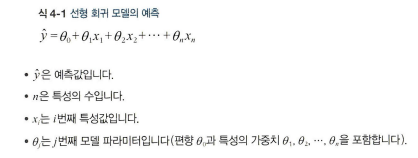

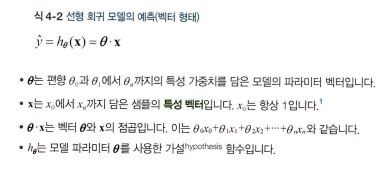

- 모델을 훈련 시킨다는것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것

[회귀] -> RMSE(평균 제곱근 오차)로 성능 평가

따라서 RMSE를 최소화하는 세타를 찾아야함


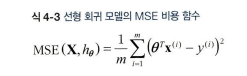

4.1.1 정규 방정식

정규 방정식 : 비용 함수를 최소화하는 세타 값을 찾기 위한 해석적인 방법 (수학 공식)

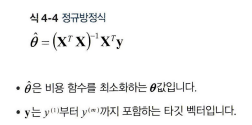

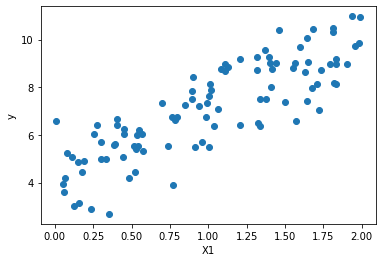

In [1]:
#공식 테스트-> 선형 데이터 생성
import numpy as np
import matplotlib.pyplot as plt

X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)
plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [2]:
#세타 햇 계산
X_b= np.c_[np.ones((100,1)),X] #모든 샘플에 X0=1을 추가합니다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

#y=4+3x1+가우시안_잡음

In [3]:
theta_best #완벽하지는 않음

array([[4.25002436],
       [2.84990125]])

In [4]:
#세타 햇을 사용해 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.25002436],
       [9.94982685]])

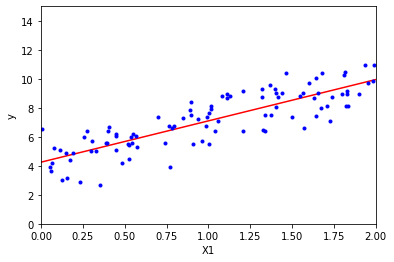

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [6]:
#사이킷런에서 선형 회귀 수행
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.25002436]), array([[2.84990125]]))

In [7]:
lin_reg.predict(X_new)

array([[4.25002436],
       [9.94982685]])

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

#theta hat= X(역행렬)*y

array([[4.25002436],
       [2.84990125]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.25002436],
       [2.84990125]])

### 4.2 경사 하강법

비용함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것

- 파라미터 벡터 theta에 대해 비용함수의 현재 그레디언트를 계산->그래디언트가 0이 되면 최솟값!

- 경사하강법에서 중요한 파라미터는 스텝의 크기로 '학습률' 파라미터로 결정 -> 너무작으면 반복을 많이 해야되서 시간이 오래걸림 / 너무크면 부정확

- 선형 회귀를 위한 MSE 비용함수는 볼록함수 -> 지역 최솟값이 없고 하나의 전역 최솟값만있음


4.2.1 배치 경사 하강법

- 경사 하강법을 구현하려면 theta가 조금 변경될 때 비용함수가 얼마나 바뀌는지 계산-> 편도함수


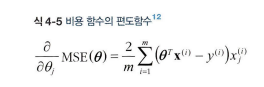

In [10]:
eta=0.1
n_iterations=1000
m=100

theta=np.random.randn(2,1) #무작위 초기화

for iteration in range(n_iterations):
  gradients =2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta -eta*gradients

theta

#정규방정식에서 찾은것과 동일

array([[4.25002436],
       [2.84990125]])

- 적절한 학습률을 찾으려면 그리드 탐색해야함
- 근데 반복횟수 너무 많으면 시간이 너무 오래걸리므로 반복횟수 제한 해야함
- 해결책 : 반복횟수를 아주 크게 지정하고 그레이디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 값 보다 작아지면 알고리즘 중지

4.2.2 확률적 경사 하강법

배치 경사 하강법 : 매 스텝에서 전체 훈련 세트를 사용해 그레이디언트를 계산함-> 훈련세트가 클경우 느려짐

확률적 경사 하강법 
- 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레이디언트를 계산 , 빠르고 큰 훈련세트도 훈련 가능
- But, 확률적 이기에 배치 경사 하강법보다 불안정, 최적치는 못구함
- 해결책 : 학습률을 점진적으로 감소. 시작할때는 학습률을 크게하고 점차 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 함

In [11]:
#확률적 경사 하강법 구현
n_epochs = 50
t0, t1 = 5,50 #학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t+t1)

theta = np.random.randn(2,1) #무작위 초기화

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2*xi.T.dot(xi.dot(theta)-yi)
    eta = learning_schedule(epoch*m+i)
    theta = theta - eta *gradients

theta

array([[4.29252628],
       [2.82980912]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())

#1000번 에포크 동안 실행
#한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행
#학습률 0.1

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgd_reg.intercept_, sgd_reg.coef_
#정규 방정식과 결과 유사

(array([4.23348896]), array([2.87247311]))

4.2.3 미니배치 경사 하강법

'미니배치'라 부르는 임의의 작은 샘플 세트에 대해 그레이디어트를 계산 -> GPU를 사용해서 얻는 성능향상

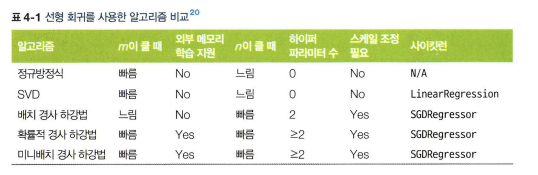

### 4.3 다항회귀

- 데이터가 단순한 직선보다 복잡한 형태라면 ? -> 비선형 데이터를 학습하는 데 선형 모델 사용가능
- 다항 회귀 : 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것 

In [14]:
# 예시
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2 + X+2+np.random.randn(m,1)

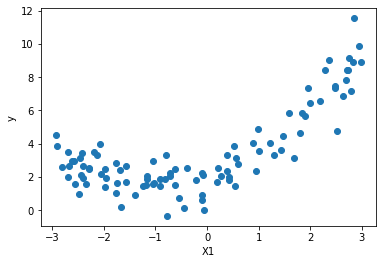

In [15]:
plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')
plt.show()
#직선은 확실히 아님

In [16]:
# 사이킷런의 PolynomialFeatures를 사용해 훈련 데이터를 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.44787055])

In [17]:
X_poly[0] #원래특성 X와 이 특성의 제곱 포함

array([-2.44787055,  5.99207021])

In [18]:
lin_reg=LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

#원래 식 : 0.5X^2 + 1.0*X1 + 2 + 가우시안 잡음
#예측 식 : 0.54X^2 + 0.93*X1 + 1.95

(array([1.96682142]), array([[0.9745728 , 0.51390783]]))

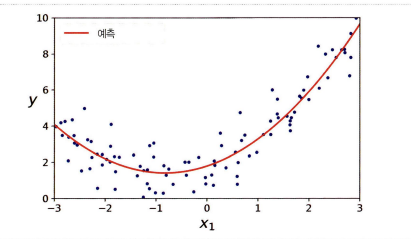

### 4.4 학습 곡선

고차 다항 회귀를 적용하면 훈련 데이터에 더 잘 맞추려고함

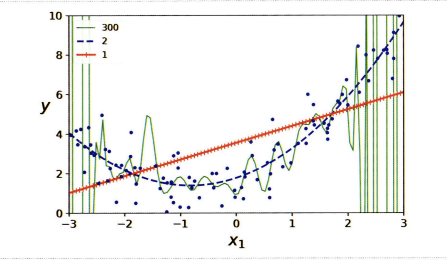

과대적합임

- 이 경우 가장 일반화가 잘 될 모델은 2차 다항 회귀

모델의 과대/과소 적합 아는 방법

1. 교차 검증
- 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘면 모델이 과대 적합
- 만약 양쪽에 모두 좋지 않으면 과소적합

2. 학습곡선

- 훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수로 나타냄

- 그래프 생성을 위해서는 단순히 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러 번 훈련시키면 됨

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1,len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training set")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation set")
  plt.ylim([0, 3.0])
  plt.xlabel('Train Set Size')
  plt.ylabel('RMSE')
  plt.legend()

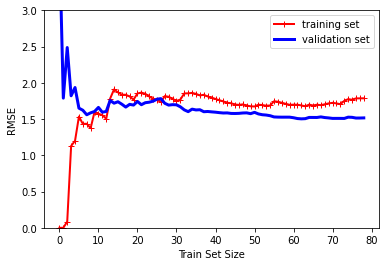

In [20]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X,y)

과소적합됨

-> 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있음

- 훈련데이터의 성능 : 그래프가 0에서 시작하므로 훈련 세트에 하나 혹은 두 개의 샘플이 있을 땐 모델이 완벽하게 작동
- 하지만, 훈련 세트에 샘플이 추가됨에 따라 잡음도 있고 완벽한 학습 불가능

- 검증데이터에 대한 모델의 성능 : 초기에는 오차가 매우큼
- 오차가 점점 감소. 하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워짐

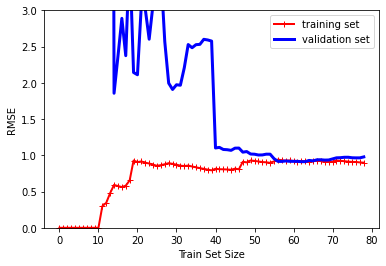

In [21]:
#10차 다항 회귀 모델의 학습 곡선 그리기

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X,y)

이전 학습 곡선과 차이점

- 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다

- 두 곡선 사이에 공간이 있다. 이 말은 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻. 이는 과대 적합 모델의 특징. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 더 가까워짐

- 과대적합 모델을 개선하는 한 가지 방법은 검증 오차가 훈련 오차에 근접할 때까지 더 많은 훈련 데이터를 추가하는 것

### 4.5 규제가 있는 선형 모델

과대적합을 감소시키는 좋은 방법은 모델을 규제하는 것

- 선형 회귀 모델에서는 보통 모델의 가중치를 제한함으로써 규제를 가함

4.5.1 릿지 회귀

- 릿지(Ridge) 회귀는 규제가 추가된 선형 회귀 버전으로, 규제항이 비용 함수에 추가됨
- 이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라 모델의 가중치가 가능한 한 작게 유지되도록 노력함
- 규제항은 훈련하는 동안에만 비용 함수에 추가되며, 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가함

- 하이퍼파라미터 alpha는 모델을 얼마나 많이 규제할지 조절 /alpha=0이면 릿지 회귀는 선형 회귀와 같아짐/ alpha가 아주 크면 모든 가중치가 거의 0에 가까워지고 결국 데이터의 평균을 지나는 수평선이 됨

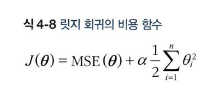


- 릿지 회귀는 수행하기 전에 데이터의 스케일을 맞추는 것이 중요!(StandardScaler). 규제가 있는 모델은 대부분 마찬가지

- 밑의 그림은 선형 데이터에 몇 가지 다른 alpha를 사용해 릿지 모델을 훈련시킨 결과

- 왼쪽은 평범한 릿지 모델 사용해 선형적이 예측

- 오른쪽은 PolynomialFeatures(degree=10)을 사용해 먼저 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정한 후 릿지 모델 적용

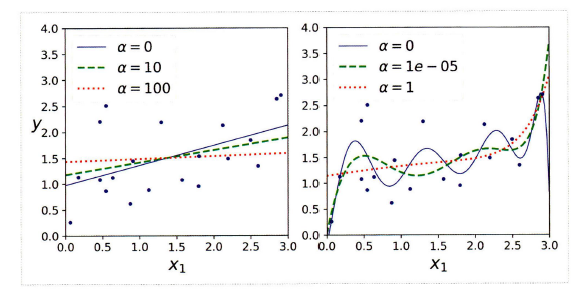

- 릿지 회귀 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있음

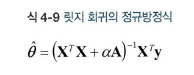

In [22]:
# 정규방정식 사용 릿지 회귀 적용 예시

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[5.17242384]])

In [23]:
#확률적 경사 하강법 사용

sgd_reg = SGDRegressor(penalty="l2") #릿지 회귀
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.15181405])

4.5.2 라쏘 회귀

- 선형 회귀의 또 다른 규제 버전

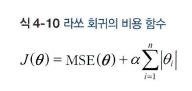

- 위의 그림과 다른점 : 릿지 모델 대신 라쏘 모델과 조금 더 작은 alpha 값 사용

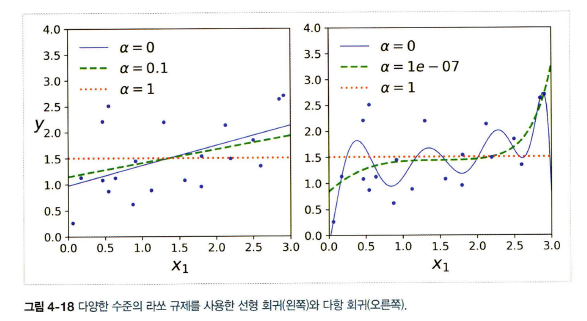

- 라쏘 회귀의 중요한 특징은 덜 중요한 특성의 가중치를 제거하려고 한다는 점 (가중치 0)
- 예를 들어, 오른쪽 그래프에서 점선은 2차 방정식처럼 보이며 거의 선형적
- 차수가 높은 다항 특성의 가중치가 모두 0이 됨
- 라쏘 회귀는 자동으로 특성 선택을 하고 희소 모델을 만든다

[라쏘 대 릿지 규제]
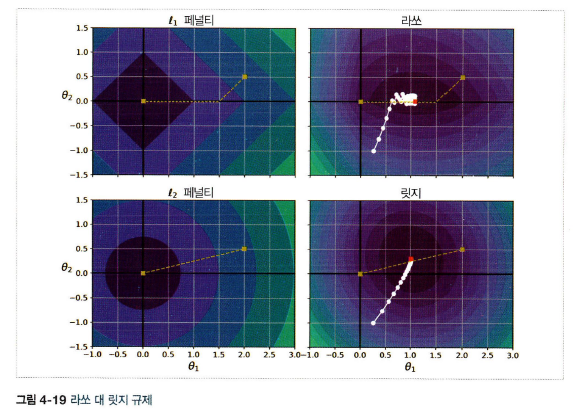

다른점

- 파라미터가 전역 최적점에 가까워질수록 그레이디언트가 작아져서 경사 하강법이 자동으로 느려지고 수렴에 도움이 됨 (진동이 없음) 
- alpha를 증가시킬수록 최적의 파라미터가 원점에 가까워지지만 완전히 0이 되지는 않음

- 라쏘의 비용 함수는 theta=0에서 미분 가능하지 않음. 하지만 `서브그레이디언트 벡터 (subgradient vector)`를 사용하면 경사 하강법을 적용하는 데 문제가 없음


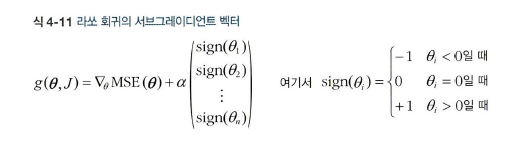

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) #Lasso 대신 SGDRegrssor(penalty='l1')을 사용할 수도 있음
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([5.1254586])

4.5.3 엘라스틱넷

: 릿지 회귀와 라쏘 회귀를 절중한 모델

-규제항은 릿지와 라쏘 회귀의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율r을 사용해 조절함
- r=0 이면 엘라스틱넷은 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같음

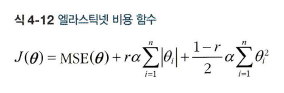




In [25]:
#예제
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([5.12638268])

4.5.4 조기 종료

: 경사 하강법과 같은 반복적인 알고리즘을 규제하는 아주 색다른 방식으로, 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것

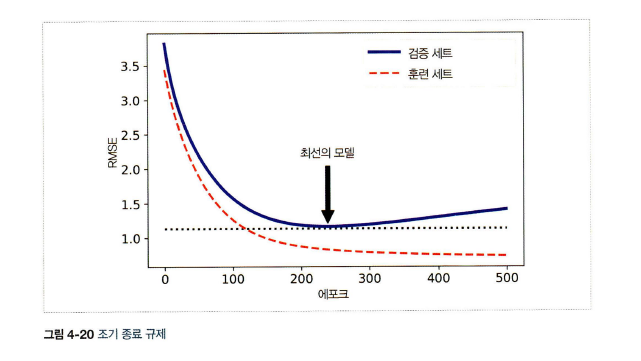

In [27]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

#데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

#warm_start=True: fit() 메소드가 호출될 때 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어감
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, 
                      penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error <  minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

InvalidParameterError: ignored

### 4.6 로지스틱 회귀

로지스틱 회귀는 샘플이 특정 클래스에 속할 확률을 추정하는데 널리 사용 (이진 분류기)

4.6.1 확률 추정

- 로지스틱 회귀는 선형 회귀 모델과 같이 입력 특성의 가중치 합을 계산하고 편향을 더함으로써 작동함
- 대신 선형 회귀처럼 바로 결과를 출력하지 않고 결과값의 로지스틱을 출력함

로지스틱 회귀모델의 확률 추정(벡터 표현식)

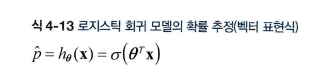

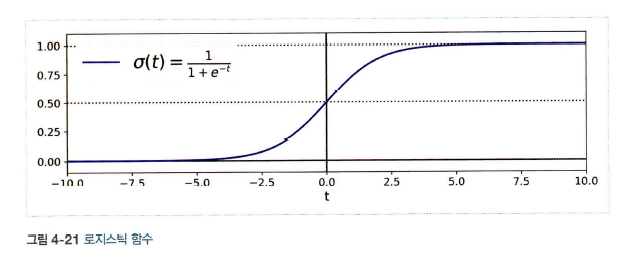

4.6.2 훈련과 비용함수

- 로지스틱 회귀 모델의 훈련의 목적은 양성 샘플 (y=1)에 대해서는 높은 확률을 추정하고 음성 샘플 (y=0)에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터theta를 찾는 것임

4.6.3 결정 경계

In [28]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [29]:
X = iris['data'][:,3:] #꽃잎의 너비
y = (iris['target']==2).astype(np.int) #Iris-Virginica면 1, 그렇지 않으면 0

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

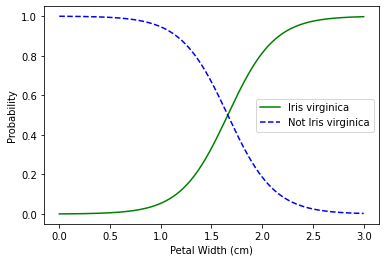

In [31]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],'g-',label='Iris virginica')
plt.plot(X_new, y_proba[:,0],'b--',label='Not Iris virginica')
plt.legend()
plt.xlabel('Petal Width (cm)')
plt.ylabel('Probability')
plt.show()

- 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근방에서 결정 경계가 만들어짐
- 꽃잎 너비가 1.6cm보다 크면 분류기는 Iris-Verginica로 분류하고, 그보다 작으면 아니라고 예측할 것임

In [32]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

선형 결정 경계

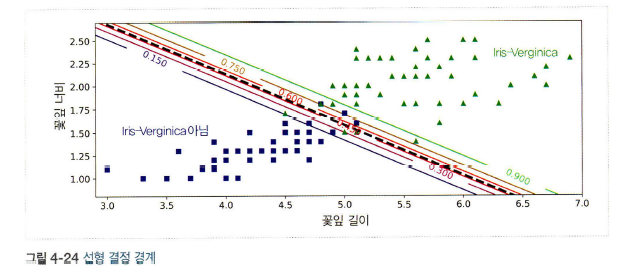

4.6.4 소프트맥스 회귀

- 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있으며 이를 소프트맥스 회귀 (softmax regression) 또는 다항 로지스틱 회귀 (multinomial logistic regression)이라고 함
- 샘플x 가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스k에 대한 점수 s(x) 를 계산하고, 그 점수에 소프트맥수 함수 (정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정함

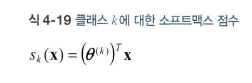

- 각 클래스는 자신만의 파라미터 벡터가 있음
- 이 벡터들은 파라미터 행렬 theta에 행으로 저장

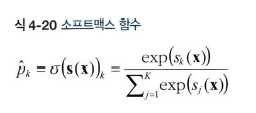

- K는 클래스 수
- s(x)는 샘플 x에 대한 각 클래스의 점수를 담은 벡터
- 시그마(s(x))는 샘플 x에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률
- 소프트맥스 회귀 분류기는 로지스틱 회귀 분류기와 마찬가지로 추정 확률이 가장 높은 클래스를 선택함

In [33]:
X = iris['data'][:,(2,3)] #꽃잎 길이, 꽃잎 너비
y = iris['target']

#multi_class='multinomial', solver='lbfgs': 소프트맥스 회귀
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [34]:
softmax_reg.predict([[5,2]])

array([2])

In [35]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])